# Happy Customers
This program takes in a csv file of survey data from a client and uses it to train a machine learning model to predict customer happiness.
The CSV file contains 7 features. The Y value will be a binary happiness value while the other features are integers from 1-5.  These attributes are as follows:

X1 - The order was delivered on time

X2 - The contents of the order was as expected

X3 - Ordered everything they wanted to

X4 - Paid a good price for the order

X5 - Satisfied with the order

X6 - The app made ordering easy

Further analysis will be done to learn which attributes most significantly affect customer happiness

In [1]:
## Import Modules
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
import csv
import matplotlib.pyplot as plt
import random
import pandas as pd
import seaborn as sn
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from utils import *

In [2]:
# Read in data
path = 'data.csv'
data = pd.read_csv(path)
data.columns = ['happinessStatus', 'onTime', 'expectedContents', 
                'allOrdered', 'goodPrice', 'orderSatisfication', 'easyOrdering']
data.head()

,happinessStatus,onTime,expectedContents,allOrdered,goodPrice,orderSatisfication,easyOrdering
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


# Visualize the data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   happinessStatus     126 non-null    int64
 1   onTime              126 non-null    int64
 2   expectedContents    126 non-null    int64
 3   allOrdered          126 non-null    int64
 4   goodPrice           126 non-null    int64
 5   orderSatisfication  126 non-null    int64
 6   easyOrdering        126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


In [4]:
data.describe()

,happinessStatus,onTime,expectedContents,allOrdered,goodPrice,orderSatisfication,easyOrdering
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,0.547619,4.333333,2.531746,3.309524,3.746032,3.650794,4.253968
std,0.499714,0.800000,1.114892,1.023440,0.875776,1.147641,0.809311
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,1.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [5]:
# Check happines status stats
data['happinessStatus'].value_counts()

1    69
0    57
Name: happinessStatus, dtype: int64

In [6]:
data.groupby('happinessStatus').mean()

,onTime,expectedContents,allOrdered,goodPrice,orderSatisfication,easyOrdering
happinessStatus,,,,,,
0,4.087719,2.561404,3.140351,3.684211,3.368421,4.105263
1,4.536232,2.507246,3.449275,3.797101,3.884058,4.376812


In [9]:
def analyzeAttribute(data, colName) :
    # Display Average
    print("Average " + colName + " value: ", data[colName].mean())
    
    # Plot histogram
    bins = np.arange(1,7) - 0.5
    plt.hist(data[colName], bins)
    plt.title(colName)
    plt.show()
    

Average onTime value:  4.333333333333333


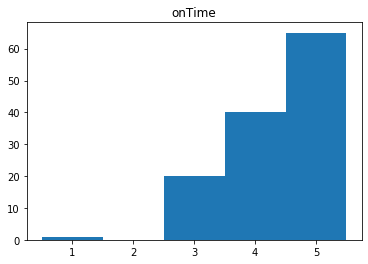

Average expectedContents value:  2.5317460317460316


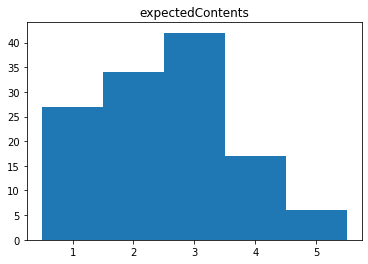

Average allOrdered value:  3.3095238095238093


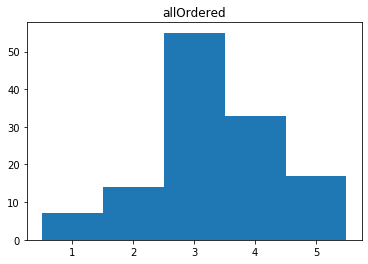

Average goodPrice value:  3.746031746031746


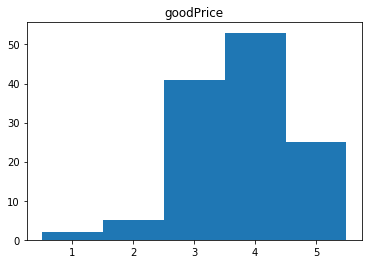

Average orderSatisfication value:  3.6507936507936507


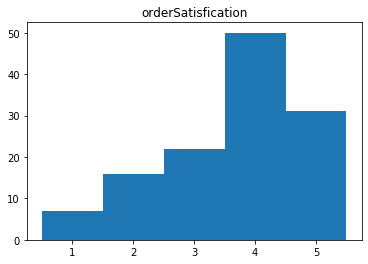

Average easyOrdering value:  4.253968253968254


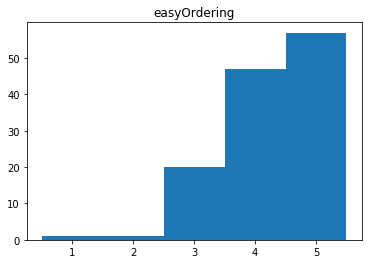

In [31]:
for i in range(1,7) :
    analyzeAttribute(data, data.columns[i])

# Preprocess Data
Divide into 80% training, 20% testing


In [8]:
# Divide Data into X and Y
X = data.drop(columns='happinessStatus')
Y = data['happinessStatus']

# Split data into training and testing
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size = 0.2, random_state = 0)

print(xTrain.shape)
print(yTrain.shape)
print(xTest.shape)
print(yTest.shape)

(100, 6)
(100,)
(26, 6)
(26,)


# Train Models
Create various models here and train them using the training data.  Test them on the separate test data and evaluate them with visual aids.

## 1. K Nearest Neighbours (KNN)
A data classification algorithm that estimates how likely a data point is to be a member of one group or the other depending on what group the data points nearest to it are in.

Starting with creating training and testing a model with the default settings but you loop through various K values

10 0.7407407407407408


Text(0, 0.5, 'F1 Score')

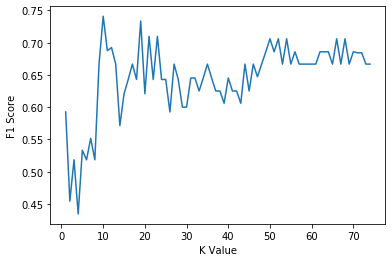

In [15]:
from sklearn.neighbors import KNeighborsClassifier

kRange = range(1,75)
results = []

# Test out a range of different k values
for k in kRange :
    KNN = KNeighborsClassifier(n_neighbors = k)
    KNN = KNN.fit(xTrain, yTrain)
    
    yPredict = KNN.predict(xTest)
    
    results.append(f1_score(yTest, yPredict))
    
print(results.index(max(results))+1, max(results)) # +1 because index starts at 0 and our results start with a kvalue of 1

plt.plot(range(1,len(results)+1), results)
plt.xlabel("K Value")
plt.ylabel("F1 Score")

F1 Score  0.7407407407407408
              precision    recall  f1-score   support

           0       0.75      0.69      0.72        13
           1       0.71      0.77      0.74        13

    accuracy                           0.73        26
   macro avg       0.73      0.73      0.73        26
weighted avg       0.73      0.73      0.73        26



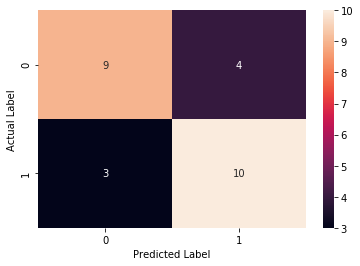

In [16]:
# Recreate k nearest neighbours model with max f1 score aka where k = 10
KNN = KNeighborsClassifier(n_neighbors=10)
KNN = KNN.fit(xTrain, yTrain)

yPredict = KNN.predict(xTest)

resultsReport(yTest, yPredict)

#### KNN Hyperparameter tuning
Create a new KNN model with different setting combinations.  zsettings explored are nearest neighbors, weights, algoroithm, leaf size and power.

In [17]:
# Hyperparameters list
n_neighbors = range(1,20)
weights = ['uniform', 'distance']
algo = ['auto', 'ball_tree', 'kd_tree', 'brute']
leafSize = range(1,30)
power = [1,2]

# Initialize model tracking variables
bestScore = 0
hyperParameterString = ''

# Loop through combinations of hyperparameters
for neigh in n_neighbors :
    for weight in weights :
        for alg in algo :
            for leaf in leafSize :
                for p in power:
                    # Create model with hyperparameter set
                    KNN = KNeighborsClassifier(n_neighbors = neigh,
                                               weights = weight,
                                               algorithm = alg,
                                               leaf_size = leaf,
                                               p = p)
                    # Fit model to training data
                    KNN = KNN.fit(xTrain, yTrain)

                    # Make predictions on test data
                    yPredict = KNN.predict(xTest)
                    
                    # Check if model scores better than any previous model
                    if f1_score(yTest, yPredict) > bestScore :
                        # Update best score
                        bestScore = f1_score(yTest, yPredict)
                        # Update hyperparameter String to keep track of what settings produced the best score
                        hyperParameterString = str(neigh) + '_' + weight + '_' + alg + '_' + str(leaf) + '_' + str(p)
                        



# Display results
print(bestScore)
print(hyperParameterString)

0.7741935483870968
14_uniform_auto_25_1


0.7741935483870968
F1 Score  0.7741935483870968
              precision    recall  f1-score   support

           0       0.88      0.54      0.67        13
           1       0.67      0.92      0.77        13

    accuracy                           0.73        26
   macro avg       0.77      0.73      0.72        26
weighted avg       0.77      0.73      0.72        26



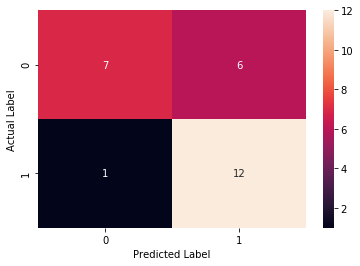

In [18]:
# Recreate k nearest neighbours model with max f1 score aka where k = 10
KNN = KNeighborsClassifier(n_neighbors=14, weights='uniform', algorithm='auto', leaf_size=25, p=1)
# Train
KNN = KNN.fit(xTrain, yTrain)

# Predict
yPredict = KNN.predict(xTest)

# Show Results
resultsReport(yTest, yPredict)

Comparing the two KNN models produced here the first one with nearest neighbours of 10 has an accuracy of 73% and predicted 14 instances as happy and 12 as unhappy.  The hyperparameter tuned model with 14 nearest neighbours, uniform weights, auto algorithm, 25 leaf size and power of 1 produced an increase an accuracy to 77% but showcased more of a bias towards predicting customers as happy (18) compared to unhappy (8).  Although the accuracy increased, the first model is more useful as the lower bias showcases better predictability.

This first model is the best model and the one chosen.  Below showcases different models tried and their respective results.

## 2. Support Vector Machine (SVM)
Outputs a hyperplane that best separates the data points, thereby classifying inputs as one class or another.

Start with creating, training and testing a model with default settings.

F1 Score  0.5517241379310345
              precision    recall  f1-score   support

           0       0.50      0.38      0.43        13
           1       0.50      0.62      0.55        13

    accuracy                           0.50        26
   macro avg       0.50      0.50      0.49        26
weighted avg       0.50      0.50      0.49        26



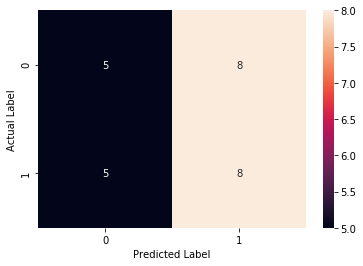

In [11]:
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Create model
SVMachine = Pipeline([('scale', StandardScaler()),# Scale inputs to 0 mean and 1 variance
                  ('SVM', svm.SVC())])
# Fit model to training dataset
SVMachine = SVMachine.fit(xTrain, yTrain)

# Make predictions on test data
yPredict = SVMachine.predict(xTest)

# Analyze results and display visual output
resultsReport(yTest, yPredict)

#### Hyperparameter tuning for SVM
Create SVM models with every type of hyperparameter combination for kernel type, degree and gamma, keep track of F1 scores and output model with best score.

In [13]:
# SVM
# Hyper parameter options
kernelType = ['linear', 'poly', 'rbf', 'sigmoid']#, 'precomputed']
degree = [1, 2, 3, 4] # Only applicable for kernel = poly
gamma = ['scale', 'auto'] # Only applicable for kernel = rbf poly or sigmoid

# Performance trackign variables
bestScore = 0
hyperParameterString = ''

# Loop through hyperparameters and create specific models
for k in kernelType :
    for d in degree :
        for g in gamma :
            
            # Create models with hyper parameter set
            SVMachine = Pipeline([('scale', StandardScaler()),# Scale inputs to 0 mean and 1 variance
                              ('SVM', svm.SVC(kernel=k, degree=d, gamma=g))])
            # Train Model
            SVMachine = SVMachine.fit(xTrain, yTrain)
            
            # Make predictions on test data set
            yPredict = SVMachine.predict(xTest)
            
            # Check if model produced a score better than the previous best
            if f1_score(yTest, yPredict) > bestScore :
                # Update best score tracking variable
                bestScore = f1_score(yTest, yPredict)
                # Update hyperparameter string to keep track of settings that produced the best model
                hyperParameterString = k + '_' + str(d) + '_' + g

# Display best model result
print(bestScore)
print(hyperParameterString)

0.8000000000000002
linear_1_scale


0.8000000000000002
F1 Score  0.8000000000000002
              precision    recall  f1-score   support

           0       0.89      0.62      0.73        13
           1       0.71      0.92      0.80        13

    accuracy                           0.77        26
   macro avg       0.80      0.77      0.76        26
weighted avg       0.80      0.77      0.76        26



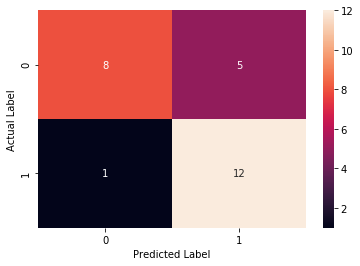

In [14]:
# Recreate SVM model with highest score (80%) -> kernel = linear, degree = 1, gamma = scale
SVMachine = Pipeline([('scale', StandardScaler()),# Scale inputs to 0 mean and 1 variance
                    ('SVM', svm.SVC(kernel='linear', degree=1, gamma='scale'))])
# Train model with appropriate settings
SVMachine = SVMachine.fit(xTrain, yTrain)

# Make predictions on test data set
yPredict = SVMachine.predict(xTest)

# Display Results
resultsReport(yTest, yPredict)

THe hyperparameter tuned SVM model produces an F1 score of 80%.  While higher than the non hyperparameter tuned SVM model and higher than both KNN models produced, it predicts 17 customers as happy and only 9 as unhappy.  That 7% accuracy increase over the best KNN model is not enough to justify the bias that this model has.

## 3. Logistic regression
The logistic regression model is used to model the probability of a certain class or event existing.

F1 Score  0.6875
              precision    recall  f1-score   support

           0       0.71      0.38      0.50        13
           1       0.58      0.85      0.69        13

    accuracy                           0.62        26
   macro avg       0.65      0.62      0.59        26
weighted avg       0.65      0.62      0.59        26



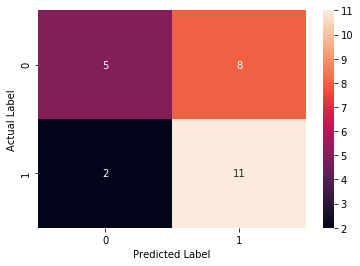

In [32]:
from sklearn.linear_model import LogisticRegression
# Create model
logReg = LogisticRegression(max_iter=100000)
# Fit model to training data
logReg = logReg.fit(xTrain, yTrain)
# Make predictions on model
yPredict = logReg.predict(xTest)

# Display results
resultsReport(yTest, yPredict)

The logistic regression model performs poorly as its accuracy is 68% and it has a bias towards predicting happy customers (19) versus unhappy customers (7).  Due to these resasons this model will not be chosen.

## 4. Gaussian Naive Bays
Model applies Bayes' theorem as a probabilistic classifier

F1 Score  0.6666666666666667
              precision    recall  f1-score   support

           0       0.67      0.46      0.55        13
           1       0.59      0.77      0.67        13

    accuracy                           0.62        26
   macro avg       0.63      0.62      0.61        26
weighted avg       0.63      0.62      0.61        26



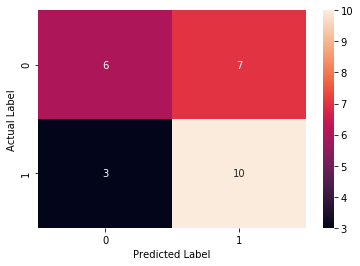

In [35]:
from sklearn.naive_bayes import GaussianNB
# Create model
GNB = GaussianNB()
# Train model on training dataset
GNB = GNB.fit(xTrain, yTrain)

# Make predictions on test data set
yPredict = GNB.predict(xTest)

# Display results
resultsReport(yTest, yPredict)

Similar to logistic regression the model has a lower accuracy and a bias towards predicting happy customers (17 versus 9).  This model will be discarded

## 5. Stochastic Gradient Descent


F1 Score  0.6666666666666666
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.50      1.00      0.67        13

    accuracy                           0.50        26
   macro avg       0.25      0.50      0.33        26
weighted avg       0.25      0.50      0.33        26



/Users/andrewmullen/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


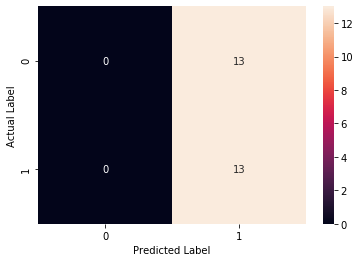

In [36]:
from sklearn.linear_model import SGDClassifier

# Create Model
SGD = SGDClassifier()
# Train model
SGD = SGD.fit(xTrain, yTrain)

# Make predictions on test dataset
yPredict = SGD.predict(xTest)

# Display results
resultsReport(yTest, yPredict)

#### SGD Hyperparameter Tuning
Create models with various combinations of sklearn's SGD setting.  Settings include loss function, penalty, and alpha/learning rate.

In [37]:
# Stocahstic Gradient Descent Hyperparameter tuning
# Hyperparameter options
loss = ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron']
penalty = ['l2', 'l1', 'elasticnet']
alpha = [0.000001, 0.00001, 0.0001, 0.001, 0.01]

# Performance tracking variables
bestScore = 0
hyperParameterString = ''

for l in loss :
    for p in penalty :
        for a in alpha :
            SGD = SGDClassifier(loss=l, penalty=p, alpha=a)
            SGD = SGD.fit(xTrain, yTrain)

            yPredict = SGD.predict(xTest)
            
            if f1_score(yTest, yPredict) > bestScore :
                bestScore = f1_score(yTest, yPredict)
                hyperParameterString = l + '_' + p + '_' + str(a)
                
# Print results
print(bestScore)
print(hyperParameterString)

0.7222222222222222
log_l2_0.01


0.0
F1 Score  0.0
              precision    recall  f1-score   support

           0       0.50      1.00      0.67        13
           1       0.00      0.00      0.00        13

    accuracy                           0.50        26
   macro avg       0.25      0.50      0.33        26
weighted avg       0.25      0.50      0.33        26



/Users/andrewmullen/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


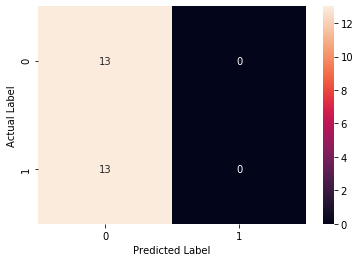

In [39]:
# Recreate model with highest f1 score
SGD = SGDClassifier(loss='hinge', penalty='l1', alpha=0.001)
SGD = SGD.fit(xTrain, yTrain)

yPredict = SGD.predict(xTest)

print(f1_score(yTest, yPredict))
resultsReport(yTest, yPredict)

The SGD model has extreme bias and terrible predictibility, even after trying to tune hyperparameters.  The algorithm also produces widely varying results every time which indicates that when it performs well it overfits the data and will not be robust enough for new unforseen data.  Therefore, it will be discarded.

## 6. Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(xTrain, yTrain)

yPredict = tree.predict(xTest)

F1 Score  0.48000000000000004
              precision    recall  f1-score   support

           0       0.50      0.54      0.52        13
           1       0.50      0.46      0.48        13

    accuracy                           0.50        26
   macro avg       0.50      0.50      0.50        26
weighted avg       0.50      0.50      0.50        26



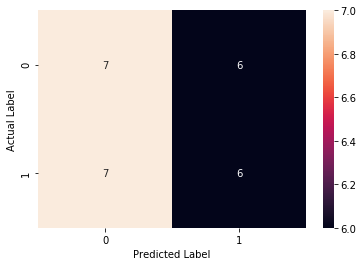

In [41]:
resultsReport(yTest, yPredict)

#### Decision Tree Hyperparameter Tuning
Create, train and test models using every combination of selected parameters. Parameters include criterion, splitter, max depth 

In [42]:
# Decision Tree
# Hyperparameter options
criterion = ['gini', 'entropy']
splitter = ['best', 'random']
max_depth = range(3,10)

# Performance trackign variables
bestScore = 0
hyperParameterString = ''

for c in criterion :
    for s in splitter :
        for m in max_depth :
            tree = DecisionTreeClassifier(criterion=c, splitter=s, max_depth=m)
            tree = tree.fit(xTrain, yTrain)
            
            yPredict = tree.predict(xTest)
            
            if f1_score(yTest, yPredict) > bestScore :
                bestScore = f1_score(yTest, yPredict)
                hyperParameterString = c + '_' + s + '_' + str(m)
                
print(bestScore)
print(hyperParameterString)

0.7058823529411765
entropy_random_3


0.7058823529411765
F1 Score  0.7058823529411765
              precision    recall  f1-score   support

           0       0.80      0.31      0.44        13
           1       0.57      0.92      0.71        13

    accuracy                           0.62        26
   macro avg       0.69      0.62      0.58        26
weighted avg       0.69      0.62      0.58        26



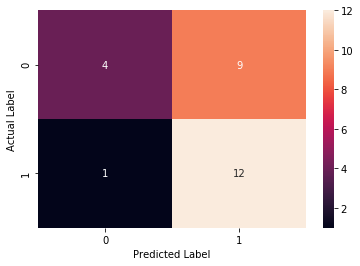

In [43]:
# Recreate decision tree with best f1 score (70%)
tree = DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=4)
tree = tree.fit(xTrain, yTrain)

yPredict = tree.predict(xTest)

print(f1_score(yTest, yPredict))
resultsReport(yTest, yPredict)

The decision tree model has high bias towards happy customers (21 versus 5) and a lower accuracy (70%) than previous ones.  It will be discarded.

## 7. Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf = rf.fit(xTrain, yTrain)

yPredict = rf.predict(xTest)

F1 Score  0.5714285714285715
              precision    recall  f1-score   support

           0       0.55      0.46      0.50        13
           1       0.53      0.62      0.57        13

    accuracy                           0.54        26
   macro avg       0.54      0.54      0.54        26
weighted avg       0.54      0.54      0.54        26



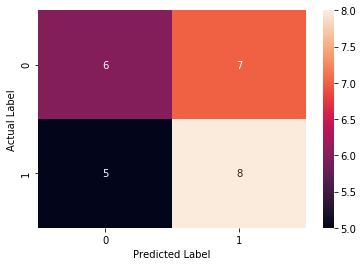

In [45]:
resultsReport(yTest, yPredict)

The random forest model showcases slight bias towards predicting happy customers (15 vs 11) and only has an accuracy of 57% therefore it will not be selected.

# Feature Importance/Selection
Here we will use a couple theorems to decide which features are of the greatest important to the best performing KNN model.

F1 Score  0.7407407407407408
              precision    recall  f1-score   support

           0       0.75      0.69      0.72        13
           1       0.71      0.77      0.74        13

    accuracy                           0.73        26
   macro avg       0.73      0.73      0.73        26
weighted avg       0.73      0.73      0.73        26



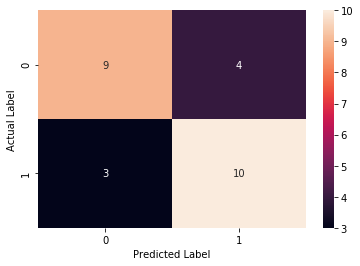

In [88]:
# Recreate k nearest neighbours model with max f1 score aka where k = 10
KNN = KNeighborsClassifier(n_neighbors=10)
KNN = KNN.fit(xTrain, yTrain)

yPredict = KNN.predict(xTest)

resultsReport(yTest, yPredict)

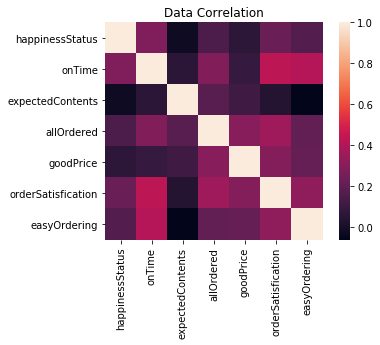

happinessStatus       1.000000
onTime                0.280160
orderSatisfication    0.224522
easyOrdering          0.167669
allOrdered            0.150838
goodPrice             0.064415
expectedContents     -0.024274
Name: happinessStatus, dtype: float64
Index(['happinessStatus', 'onTime', 'orderSatisfication', 'easyOrdering',
       'allOrdered', 'goodPrice', 'expectedContents'],
      dtype='object')


In [75]:
dataCorr = data.corr()
sn.heatmap(dataCorr, square = True)
plt.title('Data Correlation')
plt.show()
print(dataCorr['happinessStatus'].sort_values(ascending=False))


This shows how each variable relates to the happiness status of a customer.  The higher the value the better.  Therefore it showcases that the onTime value correlates the highest and therefore should be one of the most important variables.  onTime and orderSatisfaction are also relatively closely related and therefore should contain similar information.

Index(['onTime', 'expectedContents', 'allOrdered', 'goodPrice',
       'orderSatisfication', 'easyOrdering'],
      dtype='object')
Model results without Index([], dtype='object') features
F1 Score  0.7407407407407408
              precision    recall  f1-score   support

           0       0.75      0.69      0.72        13
           1       0.71      0.77      0.74        13

    accuracy                           0.73        26
   macro avg       0.73      0.73      0.73        26
weighted avg       0.73      0.73      0.73        26



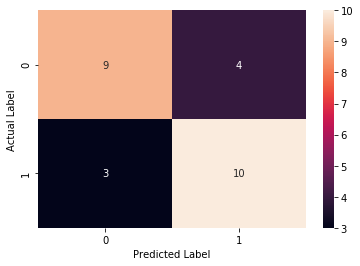


Index(['onTime', 'expectedContents', 'allOrdered', 'orderSatisfication',
       'easyOrdering'],
      dtype='object')
Model results without Index(['goodPrice'], dtype='object') features
F1 Score  0.6153846153846154
              precision    recall  f1-score   support

           0       0.62      0.62      0.62        13
           1       0.62      0.62      0.62        13

    accuracy                           0.62        26
   macro avg       0.62      0.62      0.62        26
weighted avg       0.62      0.62      0.62        26



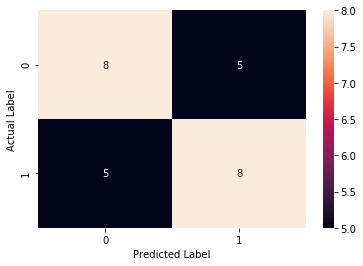


Index(['onTime', 'expectedContents', 'orderSatisfication', 'easyOrdering'], dtype='object')
Model results without Index(['goodPrice', 'allOrdered'], dtype='object') features
F1 Score  0.6666666666666666
              precision    recall  f1-score   support

           0       0.67      0.62      0.64        13
           1       0.64      0.69      0.67        13

    accuracy                           0.65        26
   macro avg       0.65      0.65      0.65        26
weighted avg       0.65      0.65      0.65        26



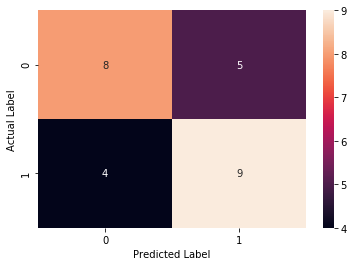


Index(['onTime', 'expectedContents', 'orderSatisfication'], dtype='object')
Model results without Index(['goodPrice', 'allOrdered', 'easyOrdering'], dtype='object') features
F1 Score  0.6428571428571429
              precision    recall  f1-score   support

           0       0.64      0.54      0.58        13
           1       0.60      0.69      0.64        13

    accuracy                           0.62        26
   macro avg       0.62      0.62      0.61        26
weighted avg       0.62      0.62      0.61        26



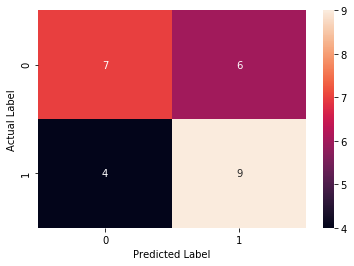


Index(['onTime', 'expectedContents'], dtype='object')
Model results without Index(['goodPrice', 'allOrdered', 'easyOrdering', 'orderSatisfication'], dtype='object') features
F1 Score  0.6451612903225806
              precision    recall  f1-score   support

           0       0.62      0.38      0.48        13
           1       0.56      0.77      0.65        13

    accuracy                           0.58        26
   macro avg       0.59      0.58      0.56        26
weighted avg       0.59      0.58      0.56        26



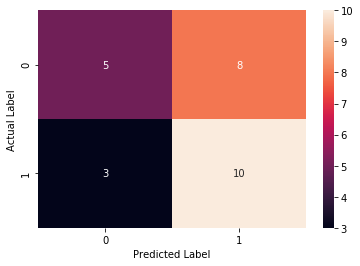

In [92]:
featureImportanceOrderCorr = dataCorr['happinessStatus'].sort_values().index[:-1]
corrScores = []
for i in range(len(featureImportanceOrderCorr[1:])) :
    
    dropColumns = featureImportanceOrderCorr[1:i+1]

    print(xTrain.drop(columns=dropColumns).columns)
    # Train new model with dropped columns
    KNN_featureSelection = KNN.fit(xTrain.drop(columns=dropColumns),yTrain)
    # Make predictions
    yPredict = KNN_featureSelection.predict(xTest.drop(columns=dropColumns))
    print('Model results without %s features' % dropColumns[:])
    resultsReport(yTest, yPredict)
    # Append results to corrScores
    corrScores.append(f1_score(yTest, yPredict))
    print()

F1 Score  0.7407407407407408
              precision    recall  f1-score   support

           0       0.75      0.69      0.72        13
           1       0.71      0.77      0.74        13

    accuracy                           0.73        26
   macro avg       0.73      0.73      0.73        26
weighted avg       0.73      0.73      0.73        26



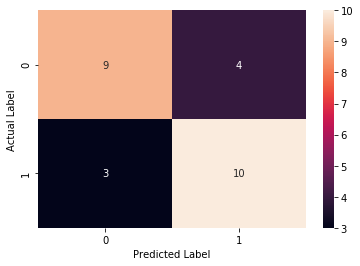

In [94]:
# Recreate k nearest neighbours model with max f1 score aka where k = 10
KNN = KNeighborsClassifier(n_neighbors=10)
KNN = KNN.fit(xTrain, yTrain)

yPredict = KNN.predict(xTest)

resultsReport(yTest, yPredict)

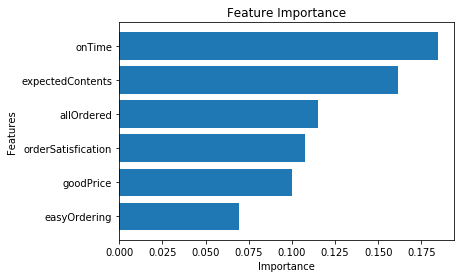

In [95]:
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(KNN, xTest, yTest)            
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.title('Feature Importance')
plt.ylabel('Features')
plt.xlabel('Importance')
plt.show()

Index(['onTime', 'expectedContents', 'allOrdered', 'goodPrice',
       'orderSatisfication'],
      dtype='object')
Model results without Index(['easyOrdering'], dtype='object') features
F1 Score  0.5925925925925927
              precision    recall  f1-score   support

           0       0.58      0.54      0.56        13
           1       0.57      0.62      0.59        13

    accuracy                           0.58        26
   macro avg       0.58      0.58      0.58        26
weighted avg       0.58      0.58      0.58        26



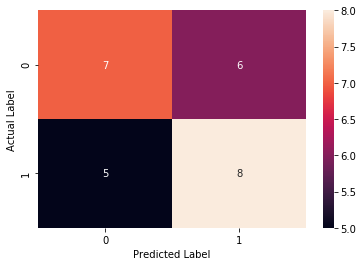


Index(['onTime', 'expectedContents', 'allOrdered', 'orderSatisfication'], dtype='object')
Model results without Index(['easyOrdering', 'goodPrice'], dtype='object') features
F1 Score  0.4999999999999999
              precision    recall  f1-score   support

           0       0.53      0.62      0.57        13
           1       0.55      0.46      0.50        13

    accuracy                           0.54        26
   macro avg       0.54      0.54      0.54        26
weighted avg       0.54      0.54      0.54        26



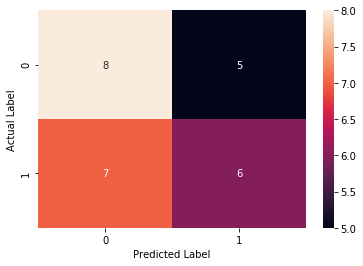


Index(['onTime', 'expectedContents', 'allOrdered'], dtype='object')
Model results without Index(['easyOrdering', 'goodPrice', 'orderSatisfication'], dtype='object') features
F1 Score  0.4761904761904762
              precision    recall  f1-score   support

           0       0.56      0.77      0.65        13
           1       0.62      0.38      0.48        13

    accuracy                           0.58        26
   macro avg       0.59      0.58      0.56        26
weighted avg       0.59      0.58      0.56        26



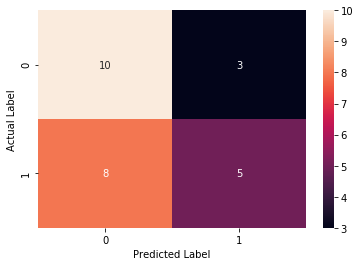


Index(['onTime', 'expectedContents'], dtype='object')
Model results without Index(['easyOrdering', 'goodPrice', 'orderSatisfication', 'allOrdered'], dtype='object') features
F1 Score  0.6451612903225806
              precision    recall  f1-score   support

           0       0.62      0.38      0.48        13
           1       0.56      0.77      0.65        13

    accuracy                           0.58        26
   macro avg       0.59      0.58      0.56        26
weighted avg       0.59      0.58      0.56        26



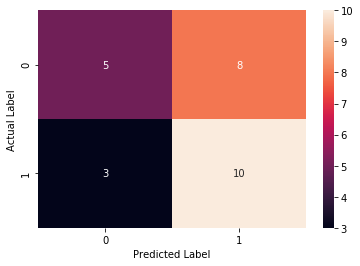


Index(['onTime'], dtype='object')
Model results without Index(['easyOrdering', 'goodPrice', 'orderSatisfication', 'allOrdered',
       'expectedContents'],
      dtype='object') features
F1 Score  0.7407407407407408
              precision    recall  f1-score   support

           0       0.75      0.69      0.72        13
           1       0.71      0.77      0.74        13

    accuracy                           0.73        26
   macro avg       0.73      0.73      0.73        26
weighted avg       0.73      0.73      0.73        26



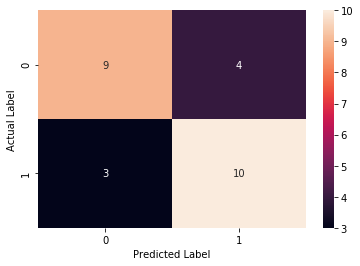

In [118]:
# Get list of column names in order from least important to most important
featureImportanceOrderPerm = X.columns[sorted_idx]

permScores = []

for i in range(len(featureImportanceOrderPerm[:-1])) :
    # Get name of columns to drop
    dropColumns = featureImportanceOrderPerm[0:i+1]

    print(xTrain.drop(columns=dropColumns).columns)
    # Train new model with dropped columns
    KNN_featureSelection = KNN.fit(xTrain.drop(columns=dropColumns),yTrain)
    # Make predictions
    yPredict = KNN_featureSelection.predict(xTest.drop(columns=dropColumns))
    print('Model results without %s features' % dropColumns[:])
    resultsReport(yTest, yPredict)
    permScores.append(f1_score(yTest,yPredict))
    print()
                                   

Text(0.5, 0, 'Feature Eliminated')

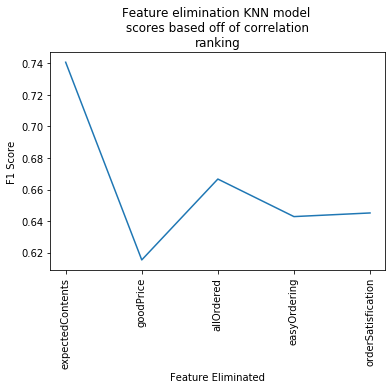

In [119]:
plt.plot(featureImportanceOrderCorr[:-1],corrScores)
plt.title('Feature elimination KNN model \n scores based off of correlation \nranking')
plt.xticks(rotation='vertical')
plt.ylabel('F1 Score')
plt.xlabel('Feature Eliminated')


Text(0.5, 0, 'Feature Eliminated')

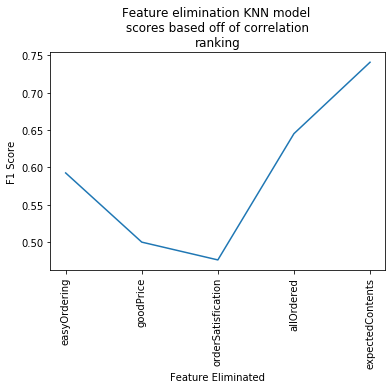

In [120]:
plt.plot(featureImportanceOrderPerm[:-1],permScores)
plt.title('Feature elimination KNN model \n scores based off of correlation \nranking')
plt.xticks(rotation='vertical')
plt.ylabel('F1 Score')
plt.xlabel('Feature Eliminated')

In [115]:
len(featureImportanceOrderPerm)

6

From the correlation heatmap the features correlation to happinessStatus are ranked: 1. onTime, 2. orderSatisfication, 3. easyOrdering, 4. allOrdered, 5. goodPrice, 6. expectedContents.  The elimination of features from the model decreased the accuracy.

From the permutation ranking of feature importance the features are ranked: 1. onTime, 2. expectedContents, 3. allOrdered, 4. orderSatisfaction, 5. goodPrice, easyOrdering.